In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

In [87]:
data = pd.read_csv('finalDf.csv', index_col = 0)

In [88]:
data.head()

,record,date,ssn//days_since,ssn//prev_d0_count,ssn//prev_d1_count,ssn//prev_d3_count,ssn//prev_d7_count,ssn//prev_d14_count,ssn//prev_d30_count,ssn//prev_d1_d3_avg,...,ssn-homephone-name-dob//prev_d0_count,ssn-homephone-name-dob//prev_d1_count,ssn-homephone-name-dob//prev_d3_count,ssn-homephone-name-dob//prev_d7_count,ssn-homephone-name-dob//prev_d14_count,ssn-homephone-name-dob//prev_d30_count,ssn-homephone-name-dob//prev_d1_d3_avg,ssn-homephone-name-dob//prev_d1_d7_avg,ssn-homephone-name-dob//prev_d1_d14_avg,ssn-homephone-name-dob//prev_d1_d30_avg
0,1,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
1,2,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
2,3,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
3,4,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
4,5,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0


### Append fraud labels

In [89]:
tempDf = pd.read_csv('/Users/XinyiGuo/Documents/USC MSBA/Spring 2020/DSO 562/Homework/Homwork 5/applications data.csv')

In [90]:
tempDf.shape

(1000000, 10)

In [91]:
tempDf.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [92]:
data['fraud_label'] = tempDf.fraud_label

In [93]:
data.head()

,record,date,ssn//days_since,ssn//prev_d0_count,ssn//prev_d1_count,ssn//prev_d3_count,ssn//prev_d7_count,ssn//prev_d14_count,ssn//prev_d30_count,ssn//prev_d1_d3_avg,...,ssn-homephone-name-dob//prev_d1_count,ssn-homephone-name-dob//prev_d3_count,ssn-homephone-name-dob//prev_d7_count,ssn-homephone-name-dob//prev_d14_count,ssn-homephone-name-dob//prev_d30_count,ssn-homephone-name-dob//prev_d1_d3_avg,ssn-homephone-name-dob//prev_d1_d7_avg,ssn-homephone-name-dob//prev_d1_d14_avg,ssn-homephone-name-dob//prev_d1_d30_avg,fraud_label
0,1,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,3.0,7.0,14.0,30.0,0
1,2,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,3.0,7.0,14.0,30.0,1
2,3,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,3.0,7.0,14.0,30.0,0
3,4,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,3.0,7.0,14.0,30.0,0
4,5,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,3.0,7.0,14.0,30.0,0


### Z scale

In [94]:
scaler = StandardScaler()

In [95]:
col = data.columns

In [96]:
col = col[2:-1]

In [97]:
col

Index(['ssn//days_since', 'ssn//prev_d0_count', 'ssn//prev_d1_count',
       'ssn//prev_d3_count', 'ssn//prev_d7_count', 'ssn//prev_d14_count',
       'ssn//prev_d30_count', 'ssn//prev_d1_d3_avg', 'ssn//prev_d1_d7_avg',
       'ssn//prev_d1_d14_avg',
       ...
       'ssn-homephone-name-dob//prev_d0_count',
       'ssn-homephone-name-dob//prev_d1_count',
       'ssn-homephone-name-dob//prev_d3_count',
       'ssn-homephone-name-dob//prev_d7_count',
       'ssn-homephone-name-dob//prev_d14_count',
       'ssn-homephone-name-dob//prev_d30_count',
       'ssn-homephone-name-dob//prev_d1_d3_avg',
       'ssn-homephone-name-dob//prev_d1_d7_avg',
       'ssn-homephone-name-dob//prev_d1_d14_avg',
       'ssn-homephone-name-dob//prev_d1_d30_avg'],
      dtype='object', length=308)

In [98]:
df = pd.DataFrame(scaler.fit_transform(data[col]), columns = col)

In [99]:
df.head().describe()

,ssn//days_since,ssn//prev_d0_count,ssn//prev_d1_count,ssn//prev_d3_count,ssn//prev_d7_count,ssn//prev_d14_count,ssn//prev_d30_count,ssn//prev_d1_d3_avg,ssn//prev_d1_d7_avg,ssn//prev_d1_d14_avg,...,ssn-homephone-name-dob//prev_d0_count,ssn-homephone-name-dob//prev_d1_count,ssn-homephone-name-dob//prev_d3_count,ssn-homephone-name-dob//prev_d7_count,ssn-homephone-name-dob//prev_d14_count,ssn-homephone-name-dob//prev_d30_count,ssn-homephone-name-dob//prev_d1_d3_avg,ssn-homephone-name-dob//prev_d1_d7_avg,ssn-homephone-name-dob//prev_d1_d14_avg,ssn-homephone-name-dob//prev_d1_d30_avg
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.021267,-0.035955,-0.055028,-0.078443,-1.067395e-01,-0.146085,0.042205,0.071354,0.103802,0.151378
std,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.551584e-17,0.000000,0.000000,0.000000,0.000000,0.000000
min,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.021267,-0.035955,-0.055028,-0.078443,-1.067395e-01,-0.146085,0.042205,0.071354,0.103802,0.151378
25%,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.021267,-0.035955,-0.055028,-0.078443,-1.067395e-01,-0.146085,0.042205,0.071354,0.103802,0.151378
50%,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.021267,-0.035955,-0.055028,-0.078443,-1.067395e-01,-0.146085,0.042205,0.071354,0.103802,0.151378
75%,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.021267,-0.035955,-0.055028,-0.078443,-1.067395e-01,-0.146085,0.042205,0.071354,0.103802,0.151378
max,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.021267,-0.035955,-0.055028,-0.078443,-1.067395e-01,-0.146085,0.042205,0.071354,0.103802,0.151378


In [100]:
df['record'] = data['record']

In [101]:
df['date'] = data['date']

In [102]:
df['fraud_label'] = data['fraud_label']

In [103]:
df.head()

,ssn//days_since,ssn//prev_d0_count,ssn//prev_d1_count,ssn//prev_d3_count,ssn//prev_d7_count,ssn//prev_d14_count,ssn//prev_d30_count,ssn//prev_d1_d3_avg,ssn//prev_d1_d7_avg,ssn//prev_d1_d14_avg,...,ssn-homephone-name-dob//prev_d7_count,ssn-homephone-name-dob//prev_d14_count,ssn-homephone-name-dob//prev_d30_count,ssn-homephone-name-dob//prev_d1_d3_avg,ssn-homephone-name-dob//prev_d1_d7_avg,ssn-homephone-name-dob//prev_d1_d14_avg,ssn-homephone-name-dob//prev_d1_d30_avg,record,date,fraud_label
0,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,1,2016-01-01,0
1,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,2,2016-01-01,1
2,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,3,2016-01-01,0
3,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,4,2016-01-01,0
4,-1.556639,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,5,2016-01-01,0


### Remove the first 2 weeks & OOT

In [107]:
df = df[(df['date']>'2016-01-17') & (df['date']<'2016-10-01')]

In [108]:
df.shape

(701893, 311)

In [109]:
df.head()

,ssn//days_since,ssn//prev_d0_count,ssn//prev_d1_count,ssn//prev_d3_count,ssn//prev_d7_count,ssn//prev_d14_count,ssn//prev_d30_count,ssn//prev_d1_d3_avg,ssn//prev_d1_d7_avg,ssn//prev_d1_d14_avg,...,ssn-homephone-name-dob//prev_d7_count,ssn-homephone-name-dob//prev_d14_count,ssn-homephone-name-dob//prev_d30_count,ssn-homephone-name-dob//prev_d1_d3_avg,ssn-homephone-name-dob//prev_d1_d7_avg,ssn-homephone-name-dob//prev_d1_d14_avg,ssn-homephone-name-dob//prev_d1_d30_avg,record,date,fraud_label
46749,-1.394987,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,46750,2016-01-18,0
46750,-1.394987,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,46751,2016-01-18,0
46751,-1.394987,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,46752,2016-01-18,0
46752,-1.394987,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,46753,2016-01-18,0
46753,-1.394987,-0.032706,-0.039149,-0.047591,-0.058092,-0.072421,-0.099012,0.056685,0.085816,0.118443,...,-0.078443,-0.106739,-0.146085,0.042205,0.071354,0.103802,0.151378,46754,2016-01-18,0


### Recursive Feature Elimination with Cross-Validation (RFECV) 

In [110]:
rank_FDR = pd.read_csv("rank_FDR.csv",index_col=0)

In [111]:
rank_FDR.head()

,Field,KS,FDR,rank_ks,rank_FDR,average_rank
0,fraud_label,1.000000,1.000000,310.0,310.0,310.0
1,address-zip5//prev_d30_count,0.333585,0.356929,308.0,309.0,308.5
2,address//prev_d30_count,0.334252,0.355083,309.0,308.0,308.5
3,address//days_since,0.328319,0.353236,307.0,307.0,307.0
4,address-zip5//days_since,0.327227,0.351477,306.0,306.0,306.0


In [112]:
rank_FDR.sort_values('average_rank', ascending=False, inplace=True)

In [113]:
top80 = rank_FDR.head(80).Field.to_list()

In [114]:
model = LogisticRegression()

In [51]:
rfecv = RFECV(estimator=model,step=1, cv=2, verbose=3, n_jobs=-1, scoring='roc_auc')

In [116]:
vars_keep = df[top80]

In [117]:
vars_keep

,fraud_label,address//prev_d30_count,address-zip5//prev_d30_count,address//days_since,address-zip5//days_since,address//prev_d14_count,address-zip5//prev_d14_count,address-zip5//prev_d7_count,address//prev_d7_count,address//prev_d3_count,...,ssn-dob//prev_d1_d30_avg,address-zip5-homephone//prev_d1_d30_avg,name-dob//prev_d1_d30_avg,ssn//prev_d1_d30_avg,ssn-name-dob//prev_d1_d30_avg,homephone//prev_d30_count,ssn-lastname//prev_d1_d30_avg,address-zip5-homephone//prev_d1_count,ssn-firstname//prev_d1_d30_avg,ssn-name//prev_d1_d30_avg
46749,0,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
46750,0,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-0.907093,0.166988,-0.04019,0.167006,0.166661
46751,0,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-0.907093,0.166988,-0.04019,0.167006,0.166661
46752,0,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
46753,0,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748637,0,-0.117706,-0.101958,-0.390855,-0.415261,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,0.140554,0.166988,-0.04019,0.167006,0.166661
748638,0,-0.117706,-0.101958,1.068994,1.047959,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,1.188200,0.166988,-0.04019,0.167006,0.166661
748639,0,-0.117706,-0.101958,1.068994,1.047959,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
748640,0,-0.117706,-0.101958,1.068994,1.047959,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,...,0.158601,0.161975,0.158905,0.16845,0.158147,-0.907093,0.166988,-0.04019,0.167006,0.166661


In [119]:
Y=vars_keep['fraud_label']

In [122]:
vars_keep.drop('fraud_label', axis=1, inplace=True)

/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [123]:
vars_keep

,address//prev_d30_count,address-zip5//prev_d30_count,address//days_since,address-zip5//days_since,address//prev_d14_count,address-zip5//prev_d14_count,address-zip5//prev_d7_count,address//prev_d7_count,address//prev_d3_count,address-zip5//prev_d3_count,...,ssn-dob//prev_d1_d30_avg,address-zip5-homephone//prev_d1_d30_avg,name-dob//prev_d1_d30_avg,ssn//prev_d1_d30_avg,ssn-name-dob//prev_d1_d30_avg,homephone//prev_d30_count,ssn-lastname//prev_d1_d30_avg,address-zip5-homephone//prev_d1_count,ssn-firstname//prev_d1_d30_avg,ssn-name//prev_d1_d30_avg
46749,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
46750,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-0.907093,0.166988,-0.04019,0.167006,0.166661
46751,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-0.907093,0.166988,-0.04019,0.167006,0.166661
46752,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
46753,-0.117706,-0.101958,-1.357768,-1.384406,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748637,-0.117706,-0.101958,-0.390855,-0.415261,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,0.140554,0.166988,-0.04019,0.167006,0.166661
748638,-0.117706,-0.101958,1.068994,1.047959,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,1.188200,0.166988,-0.04019,0.167006,0.166661
748639,-0.117706,-0.101958,1.068994,1.047959,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-1.256308,0.166988,-0.04019,0.167006,0.166661
748640,-0.117706,-0.101958,1.068994,1.047959,-0.088541,-0.079045,-0.067095,-0.072633,-0.060819,-0.057932,...,0.158601,0.161975,0.158905,0.16845,0.158147,-0.907093,0.166988,-0.04019,0.167006,0.166661


In [124]:
rfecv.fit(vars_keep, Y)

Fitting estimator with 79 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 78 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 77 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 76 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 75 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 74 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 73 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 72 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 71 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 70 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 69 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 68 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 67 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 66 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 65 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 64 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 63 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 62 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 61 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 60 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 59 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 58 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 57 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 56 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 55 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 54 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 53 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 52 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 51 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 50 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 49 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 48 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 47 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 46 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 45 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 44 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 43 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 42 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 41 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 40 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 39 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 38 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 37 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 36 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fitting estimator with 35 features.


/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/XinyiGuo/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_m

RFECV(cv=2,
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='auto', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='lbfgs', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=-1, scoring='roc_auc', step=1,
      verbose=3)

In [130]:
rfecv.ranking_

array([25,  1,  1,  1, 16,  1,  1, 24, 38,  1, 32,  7,  1,  1,  1, 31, 26,
        1,  1,  1,  1,  1,  1,  1,  1,  1, 29, 10,  1,  9,  3,  1, 19, 42,
        1,  1, 45, 17,  1,  1, 12, 39,  1, 30,  1, 13,  4,  5, 20,  1, 33,
       46,  1, 34, 35,  1, 28,  1,  2, 18,  1, 22,  1, 11, 37, 44, 23, 36,
        1, 43,  6, 15,  1, 14, 27, 21,  8, 40, 41])

In [127]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv.ranking_), vars_keep.columns)), columns=['ranking', 'variable'])

In [128]:
var_selected

,ranking,variable
0,1,address-zip5-homephone//days_since
1,1,address-zip5-homephone//prev_d14_count
2,1,address-zip5-homephone//prev_d30_count
3,1,address-zip5-homephone//prev_d7_count
4,1,address-zip5//days_since
...,...,...
74,42,name//prev_d30_count
75,43,ssn-dob//prev_d1_d30_avg
76,44,ssn-name//prev_d3_count
77,45,ssn-name-dob//prev_d14_count


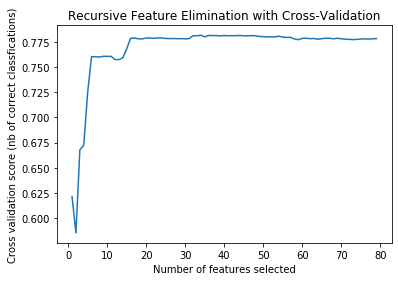

In [148]:
plt.figure()
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classfications)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

In [146]:
rfecv.grid_scores_[24]

0.7785787670640674

In [155]:
#select top features with ranking = 1
top34 = var_selected[var_selected.ranking==1].variable.to_list()

### Save top 34 features df

In [171]:
data = pd.read_csv('finalDf.csv', index_col = 0)

In [172]:
data.head()

,record,date,ssn//days_since,ssn//prev_d0_count,ssn//prev_d1_count,ssn//prev_d3_count,ssn//prev_d7_count,ssn//prev_d14_count,ssn//prev_d30_count,ssn//prev_d1_d3_avg,...,ssn-homephone-name-dob//prev_d0_count,ssn-homephone-name-dob//prev_d1_count,ssn-homephone-name-dob//prev_d3_count,ssn-homephone-name-dob//prev_d7_count,ssn-homephone-name-dob//prev_d14_count,ssn-homephone-name-dob//prev_d30_count,ssn-homephone-name-dob//prev_d1_d3_avg,ssn-homephone-name-dob//prev_d1_d7_avg,ssn-homephone-name-dob//prev_d1_d14_avg,ssn-homephone-name-dob//prev_d1_d30_avg
0,1,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
1,2,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
2,3,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
3,4,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0
4,5,2016-01-01,0.0,1,1,1,1,1,1,3.0,...,1,1,1,1,1,1,3.0,7.0,14.0,30.0


In [ ]:
data.loc[:, ]

### Append fraud labels

In [173]:
tempDf = pd.read_csv('/Users/XinyiGuo/Documents/USC MSBA/Spring 2020/DSO 562/Homework/Homwork 5/applications data.csv')

In [174]:
tempDf.shape

(1000000, 10)

In [175]:
tempDf.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20160101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20160101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20160101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20160101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20160101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [176]:
data['fraud_label'] = tempDf.fraud_label

In [190]:
filterList = ['record', 'date']

In [191]:
filterList.extend(top34)

In [192]:
filterList.append('fraud_label')

In [193]:
filterList

['record',
 'date',
 'address-zip5-homephone//days_since',
 'address-zip5-homephone//prev_d14_count',
 'address-zip5-homephone//prev_d30_count',
 'address-zip5-homephone//prev_d7_count',
 'address-zip5//days_since',
 'address-zip5//prev_d0_count',
 'address-zip5//prev_d14_count',
 'address-zip5//prev_d1_d14_avg',
 'address-zip5//prev_d1_d30_avg',
 'address-zip5//prev_d1_d7_avg',
 'address-zip5//prev_d30_count',
 'address-zip5//prev_d3_count',
 'address-zip5//prev_d7_count',
 'address//days_since',
 'homephone//prev_d1_count',
 'homephone//prev_d7_count',
 'name-dob//days_since',
 'name-dob//prev_d30_count',
 'ssn-dob//days_since',
 'ssn-dob//prev_d30_count',
 'ssn-firstname//prev_d30_count',
 'ssn-firstname//prev_d7_count',
 'ssn-lastname//prev_d14_count',
 'ssn-lastname//prev_d30_count',
 'ssn-name-dob//days_since',
 'ssn-name-dob//prev_d3_count',
 'ssn-name//days_since',
 'ssn-name//prev_d14_count',
 'ssn-name//prev_d30_count',
 'ssn//days_since',
 'ssn//prev_d14_count',
 'ssn//prev_

In [194]:
df34 = data[filterList]

In [197]:
#df34.to_csv('df34var.csv')